In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read the url

url = "https://www.flipkart.com/laptops/~laptops-under-rs50000/pr?sid=6bo,b5g"

In [3]:
response = requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
response = response.content

In [6]:
soup = BeautifulSoup(response,'html.parser')

In [7]:
type(soup)

bs4.BeautifulSoup

In [8]:
containers = soup.findAll('div',{'class':'_2kHMtA'})

In [9]:
containers = soup.findAll('div',{'class':'_2kHMtA'})
print(type(containers),len(containers))

<class 'bs4.element.ResultSet'> 24


In [10]:
containers[2]

<div class="_2kHMtA"><a class="_1fQZEK" href="/hp-2023-athlon-dual-core-3050u-8-gb-512-gb-ssd-windows-11-home-15s-ey1509au-thin-light-laptop/p/itm930fe4c90a2f8?pid=COMGZVGHZXXRMWMU&amp;lid=LSTCOMGZVGHZXXRMWMUKR6CBK&amp;marketplace=FLIPKART&amp;store=6bo%2Fb5g&amp;srno=b_1_3&amp;otracker=browse&amp;fm=organic&amp;iid=e29285d2-ca19-4fdd-b25c-64bca3205bf2.COMGZVGHZXXRMWMU.SEARCH&amp;ppt=None&amp;ppn=None&amp;ssid=g3odrimj5c0000001698683481045" rel="noopener noreferrer" target="_blank"><div class="MIXNux"><div class="_2QcLo-"><div><div class="CXW8mj" style="height:200px;width:200px"><img alt="HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB SSD/Windows 11 Home) 15s-ey1509AU Thin and Light Laptop" class="_396cs4" loading="eager" src="https://rukminim2.flixcart.com/image/312/312/xif0q/computer/5/6/i/-original-imaggshd5zgfe8ev.jpeg?q=70"/></div></div></div><div class="_3wLduG"><div class="_3PzNI-"><span class="f3A4_V"><label class="_2iDkf8"><input class="_30VH1S" readonly="" type="checkbox"/><di

In [11]:
f = open('laptop_info.csv','wb')
f.write('product,stars,price,rating,processor,ram,hardisk,ImageURL\n'.encode())
for container in containers:
    product = container.find('div',{'class':"_4rR01T"})
    product=product.text.split('-')[0].strip()

   #total star laptop  
    stars= container.find('div',{'class':'_3LWZlK'}).text
   
    
   # top price of laptop
    price = container.find('div',{'class':'_30jeq3 _1_WHN1'}).text.replace(',','').replace('₹','')
   
  # best rating of laptop 
    rating = container.find('span',{'class':'_2_R_DZ'}).text.replace(',','')
   
        
    # informartion for processer
    
    info=container.findAll('li',{'class':'rgWa7D'})
    processor=info[0].text.replace(',','')
    ram=info[1].text.replace(',','')
    hardisk=info[3].text
    
 
    
    Image = container.img
    ImageURL=Image.get('src')
    print(product,stars,price,rating,processor,ram,hardisk,ImageURL)
    f.write(f"{product},{stars},{price},{rating},{processor},{ram},{hardisk},{ImageURL}\n".encode())
    print('\n')
f.close()

Primebook Wifi MT8183 4.2 9990 709 Ratings & 191 Reviews MediaTek MT8183 Processor 4 GB LPDDR4 RAM 29.46 cm (11.6 Inch) Display https://rukminim2.flixcart.com/image/312/312/xif0q/computer/5/c/5/-original-imagtrj27kprghgz.jpeg?q=70


HP Chromebook MediaTek Kompanio 500 3.7 21190 6746 Ratings & 745 Reviews MediaTek Kompanio 500 Processor 4 GB LPDDR4X RAM 29.46 cm (11.6 inch) Touchscreen Display https://rukminim2.flixcart.com/image/312/312/xif0q/computer/2/m/e/-original-imagkqwzw9cdvgj2.jpeg?q=70


HP 2023 Athlon Dual Core 3050U 4.1 27990 2688 Ratings & 220 Reviews AMD Athlon Dual Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/5/6/i/-original-imaggshd5zgfe8ev.jpeg?q=70


HP 2023 Ryzen 3 Dual Core 3250U 4.2 30990 2924 Ratings & 271 Reviews AMD Ryzen 3 Dual Core Processor 8 GB DDR4 RAM 512 GB SSD https://rukminim2.flixcart.com/image/312/312/xif0q/computer/g/n/j/-original-imaguegfkhrkykxb.jpeg?q=70


DELL Core i3 12th Gen 1215U 4.2 36290 5

In [12]:
rating = container.find('span',{'class':'_2_R_DZ'})
     print(rating)

IndentationError: unexpected indent (Temp/ipykernel_10184/188385180.py, line 2)

In [ ]:
import re

ratview=re.findall('\d+,*\d+','457 Ratings & 111 Reviews')
print(ratview[0],ratview[1])

In [ ]:
df = pd.read_csv('laptop_info.csv')

 # Find the product having highest Ratings ?

In [13]:
df = pd.read_csv('laptop_info.csv')

In [14]:
df.head()

,product,stars,price,rating,processor,ram,hardisk,ImageURL
0,Primebook Wifi MT8183,4.2,9990,709 Ratings & 191 Reviews,MediaTek MT8183 Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 Inch) Display,https://rukminim2.flixcart.com/image/312/312/x...
1,HP Chromebook MediaTek Kompanio 500,3.7,21190,6746 Ratings & 745 Reviews,MediaTek Kompanio 500 Processor,4 GB LPDDR4X RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim2.flixcart.com/image/312/312/x...
2,HP 2023 Athlon Dual Core 3050U,4.1,27990,2688 Ratings & 220 Reviews,AMD Athlon Dual Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
3,HP 2023 Ryzen 3 Dual Core 3250U,4.2,30990,2924 Ratings & 271 Reviews,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
4,DELL Core i3 12th Gen 1215U,4.2,36290,516 Ratings & 58 Reviews,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,RAM & Storage: 8GB DDR4 & 512GB SSD,"Display: 15.6"" FHD WVA AG 120Hz 250 nits Narro...",https://rukminim2.flixcart.com/image/312/312/x...


In [15]:
df['rating'].max()

'709 Ratings\xa0&\xa0191 Reviews'

In [16]:
df[df['rating']==max(df['rating'])]

,product,stars,price,rating,processor,ram,hardisk,ImageURL
0,Primebook Wifi MT8183,4.2,9990,709 Ratings & 191 Reviews,MediaTek MT8183 Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 Inch) Display,https://rukminim2.flixcart.com/image/312/312/x...


In [17]:
df.head()

,product,stars,price,rating,processor,ram,hardisk,ImageURL
0,Primebook Wifi MT8183,4.2,9990,709 Ratings & 191 Reviews,MediaTek MT8183 Processor,4 GB LPDDR4 RAM,29.46 cm (11.6 Inch) Display,https://rukminim2.flixcart.com/image/312/312/x...
1,HP Chromebook MediaTek Kompanio 500,3.7,21190,6746 Ratings & 745 Reviews,MediaTek Kompanio 500 Processor,4 GB LPDDR4X RAM,29.46 cm (11.6 inch) Touchscreen Display,https://rukminim2.flixcart.com/image/312/312/x...
2,HP 2023 Athlon Dual Core 3050U,4.1,27990,2688 Ratings & 220 Reviews,AMD Athlon Dual Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
3,HP 2023 Ryzen 3 Dual Core 3250U,4.2,30990,2924 Ratings & 271 Reviews,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
4,DELL Core i3 12th Gen 1215U,4.2,36290,516 Ratings & 58 Reviews,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,RAM & Storage: 8GB DDR4 & 512GB SSD,"Display: 15.6"" FHD WVA AG 120Hz 250 nits Narro...",https://rukminim2.flixcart.com/image/312/312/x...


In [18]:
df['stars'].max()

4.4

In [19]:
df[df['stars']==max(df['stars'])]

,product,stars,price,rating,processor,ram,hardisk,ImageURL
5,realme Book (Slim) Core i3 11th Gen 1115G4,4.4,34999,15234 Ratings & 2137 Reviews,Stylish & Portable Thin and Light Laptop,14 inch 2K QHD IPS LCD Display ( 400nits peak ...,Light Laptop without Optical Disk Drive,https://rukminim2.flixcart.com/image/312/312/k...


In [20]:
df.shape

(24, 8)

In [21]:
df['ram'].value_counts()[0:5].keys()

Index(['4 GB LPDDR4 RAM', '8 GB DDR4 RAM', '8 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '4 GB DDR4 RAM'],
      dtype='object')

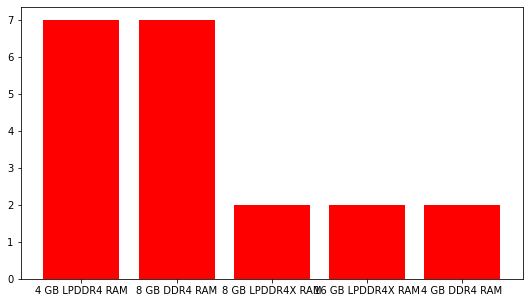

In [22]:
plt.figure(figsize=(9,5))
plt.bar(list(df['ram'].value_counts()[0:5].keys()),list(df['ram'].value_counts()[0:5]),color='r')
plt.show()

In [23]:
# top 5 rating laptop
gh=df.sort_values('price',ascending= False ).head()

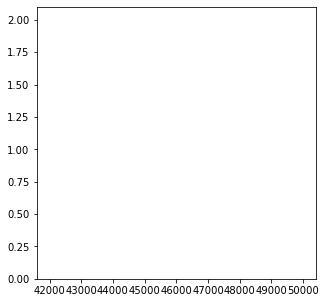

In [24]:
plt.figure(figsize=(5,5))
plt.bar(list(gh['price'].value_counts()[0:5].keys()),list(gh['price'].value_counts()[0:5]),color='g')
plt.show()

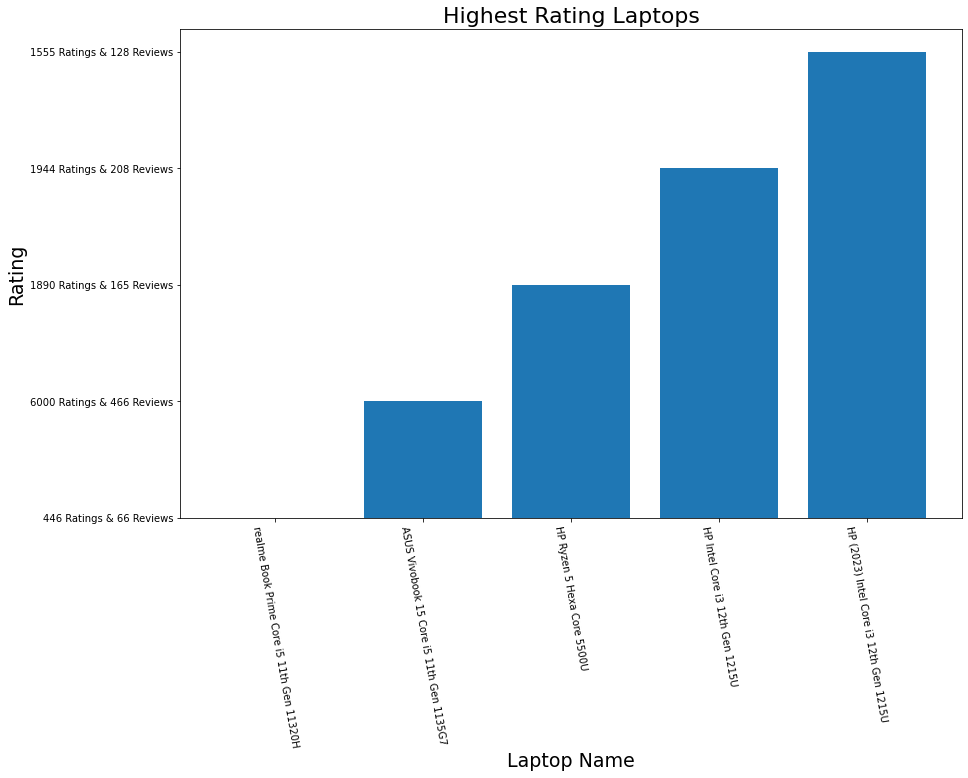

In [25]:
plt.figure(figsize=(14,9))
plt.bar(x=gh['product'],height=gh['rating'])
plt.title('Highest Rating Laptops', fontsize=22)
plt.xlabel('Laptop Name', fontsize=19)
plt.ylabel('Rating',fontsize=19)
plt.xticks(rotation=280)
plt.savefig('mylaptopchart.jpg')
plt.show()

In [26]:
kl=df.sort_values('price', ascending=False)

In [27]:
kl

,product,stars,price,rating,processor,ram,hardisk,ImageURL
8,realme Book Prime Core i5 11th Gen 11320H,4.3,49990,446 Ratings & 66 Reviews,Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/l...
23,ASUS Vivobook 15 Core i5 11th Gen 1135G7,4.3,43990,6000 Ratings & 466 Reviews,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
9,HP Ryzen 5 Hexa Core 5500U,4.3,42490,1890 Ratings & 165 Reviews,AMD Ryzen 5 Hexa Core Processor,16 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
22,HP Intel Core i3 12th Gen 1215U,4.2,41990,1944 Ratings & 208 Reviews,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
13,HP (2023) Intel Core i3 12th Gen 1215U,4.3,41990,1555 Ratings & 128 Reviews,Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
4,DELL Core i3 12th Gen 1215U,4.2,36290,516 Ratings & 58 Reviews,Processor: Intel i3-1215U (Base- 0.9 GHz & Tur...,RAM & Storage: 8GB DDR4 & 512GB SSD,"Display: 15.6"" FHD WVA AG 120Hz 250 nits Narro...",https://rukminim2.flixcart.com/image/312/312/x...
5,realme Book (Slim) Core i3 11th Gen 1115G4,4.4,34999,15234 Ratings & 2137 Reviews,Stylish & Portable Thin and Light Laptop,14 inch 2K QHD IPS LCD Display ( 400nits peak ...,Light Laptop without Optical Disk Drive,https://rukminim2.flixcart.com/image/312/312/k...
15,Infinix X2 Slim Intel Core i5 11th Gen 1155G7,4.2,34990,379 Ratings & 65 Reviews,Intel Core i5 Processor (11th Gen),16 GB LPDDR4X RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
3,HP 2023 Ryzen 3 Dual Core 3250U,4.2,30990,2924 Ratings & 271 Reviews,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...
12,Acer One Core i3 11th Gen 1115G4,4.2,27990,3090 Ratings & 271 Reviews,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,512 GB SSD,https://rukminim2.flixcart.com/image/312/312/x...


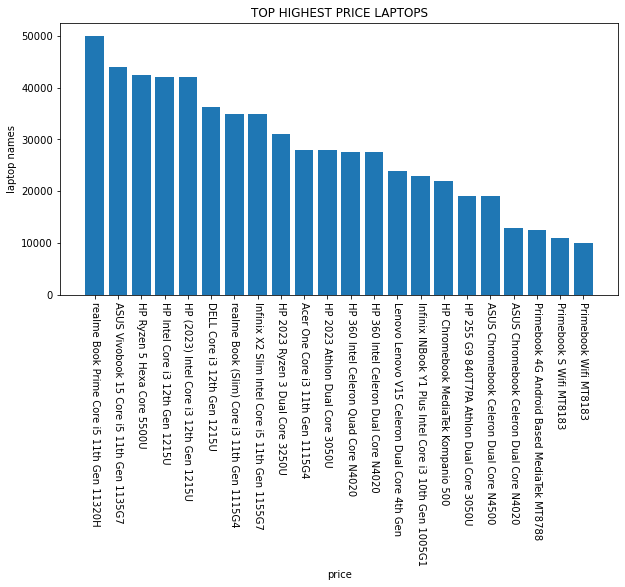

In [29]:
plt.figure(figsize=(10,5))
plt.bar(x=kl['product'],height=kl['price'])
plt.title('TOP HIGHEST PRICE LAPTOPS')
plt.xlabel('price')
plt.ylabel('laptop names')
plt.xticks(rotation=270)
plt.show()